In [1]:
import pandas as pd
import numpy as np

In [2]:
""" Read data to be used """
# In this example, a dataset about spamming is used
data = pd.read_csv('spambase.csv',sep=",")
data.head()

""" Some preprocessing on data """
# Number of features
m = data.shape[1]
# Remove unwanted features
X = data.iloc[:,0:48]
y = data.iloc[:,(m-1):]

# Turn data into onehot format
X_onehot = pd.get_dummies(X)

In [3]:
from sklearn.model_selection import train_test_split
""" Splitting training and testing data """
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.25, random_state=33)

In [4]:
""" Import BRF classifiers """
from BoostedRandomForest import BoostedRandomForest
from sklearn.ensemble import RandomForestClassifier
"""
brf = BoostedRandomForest()
rf = BoostedRandomForest(weight_update=False, boosting=False)
brf_wout_update = BoostedRandomForest(weight_update=False)
"""

'brf = BoostedRandomForest()\nrf = BoostedRandomForest(weight_update=False, boosting=False)\nbrf_wout_update = BoostedRandomForest(weight_update=False)'

In [ ]:
""" Function for evaluating a classifier"""
from sklearn.metrics import accuracy_score
from time import time

def eval_clf(method, CLF, params, X_train, X_test, y_train, y_test, iterations) :
    # List of accuracies in each iteration
    accs = []
    # List of time used for training
    times = []
    
    # Train classifier for iterations
    for it in range(iterations) :
        #print("Iteraiton: ", it)        
        # Create classifier
        clf = CLF(**params)
        
        #Start timer
        start = time()
        # Train classifier
        clf.fit(X_train, y_train)
        # End timer 
        end = time()
        # Record time
        times.append(end-start)
        
        # Give predictions
        if method == "Ensemble" :
            pred = clf.ensemble_predict(X_test)
        elif method == "RF" :
            pred = clf.RF_predict(X_test)
        else :
            pred = clf.predict(X_test)
            
        # Calculate accuracy
        acc = accuracy_score(y_test, pred)
        
        # Record accuracy
        accs.append(acc)
        
        
    # Return results and times used
    return accs, times

In [ ]:
# Number of iterations to train classifier to get results
iterations = 10
# Max number of trees per classifier
max_tree = 150
# Max depth for each tree
max_depth = 50

In [ ]:
""" Boosted Random Forest """
brf_params = {'weight_update': True, 'boosting': True}


brf_results = []
start = time()
for T in range(5, max_tree+1, 5) :
    for D in range(5, max_depth+1, 5) :
        print('Max number of trees: {}, Max depth: {}'.format(T, D))
        # Set max number of trees
        brf_params['T'] = T
        # Set max depth for each tree
        brf_params['depth_max'] = D
        # Train classifier
        brf_accs, brf_times = eval_clf("Ensemble", BoostedRandomForest, brf_params, X_train, X_test, y_train, y_test, iterations)
        # Calcuate mean results
        mean_acc = np.mean(brf_accs)
        mean_time = np.mean(brf_times)
        print("Mean acc: {}; Mean time: {}".format(mean_acc, mean_time))
        # Record results
        brf_results.append(['brf', T, D, mean_acc, mean_time])
        
        # Report time used for evaluation
        end = time()
        print("Total time spent for evaluation: ", end-start)


In [ ]:
# Output results to csv file
brf_df = pd.DataFrame(brf_results)
brf_df.to_csv("brf_results.csv", header=['Method', '#Tree', 'Max_Depth', 'Mean_Acc', 'Mean_Time'], index=False) 

In [5]:
# Evaluate training accuracy on the fly
brf_clf = BoostedRandomForest(depth_max=20, T=250, weight_update=True, boosting=True)
brf_clf.fit(X_train, y_train)

In [17]:
# Training accuracies 
brf_train_accs = brf_clf.train_accs
print(len(brf_train_accs))
# Epsilons
brf_eps = brf_clf.all_eps
print(len(brf_eps))
# Alphas
brf_alphas = brf_clf.all_alphas
print(len(brf_alphas))

200
250
250


In [18]:
# Output results to csv file
#brf_20_df = pd.DataFrame({'Acc':brf_train_accs, 'Eps:'})


In [15]:
print(np.array(brf_alphas)[np.where(np.array(brf_eps) < 1e-20)])

[]


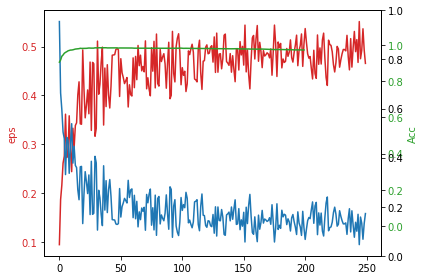

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()

# Epsilons
color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('eps', color=color)
ax1.plot(brf_eps, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
# Alphas
color = 'tab:blue'
ax2.set_ylabel('alphas', color=color)  
ax2.plot(brf_alphas, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Accuracy
ax3 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Acc', color=color)  
ax2.plot(brf_train_accs, color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Output results to csv file
brf_train_accs_df = pd.DataFrame(brf_train_accs)
brf_train_accs_df.to_csv("brf_train_accs.csv", header=['Acc'], index=False) 

In [ ]:
""" sklearn random forest """
rf_accs, rf_times, rt_clfs = eval_clf("", RandomForestClassifier, {}, X_train, X_test, y_train, y_test, iterations)

In [ ]:
""" Boosted Random Forest without weights update """
brf_wout_update_params = {'weight_update': False, 'boosting': True}


brf_wout_update_results = []
start = time()
for T in range(5, max_tree+1, 5) :
    for D in range(5, max_depth+1, 5) :
        print('Max number of trees: {}, Max depth: {}'.format(T, D))
        # Set max number of trees
        brf_wout_update_params['T'] = T
        # Set max depth for each tree
        brf_wout_update_params['depth_max'] = D
        # Train classifier
        brf_wout_update_accs, brf_wout_update_times = eval_clf("Ensemble", BoostedRandomForest, brf_wout_update_params, X_train, X_test, y_train, y_test, iterations)
        # Calcuate mean results
        mean_acc = np.mean(brf_wout_update_accs)
        mean_time = np.mean(brf_wout_update_times)
        print("Mean acc: {}; Mean time: {}".format(mean_acc, mean_time))
        # Record results
        brf_wout_update_results.append(['brf_wout_update', T, D, mean_acc, mean_time])
        
        # Report time used for evaluation
        end = time()
        print("Total time spent for evaluation: ", end-start)

In [ ]:
# Evaluate training accuracy on the fly
brf_wout_update_clf = BoostedRandomForest(depth_max=20, T=200, weight_update=False, boosting=True)
brf_wout_update_clf.fit(X_train, y_train)

In [ ]:
brf_wout_update_train_accs = brf_wout_update_clf.train_accs 

In [ ]:
# Output results to csv file
brf_wout_update_train_accs_df = pd.DataFrame(brf_wout_update_train_accs)
brf_wout_update_train_accs_df.to_csv("brf_wout_update_train_accs.csv", header=['Acc'], index=False)

In [ ]:
""" Random Forest """
brf_rf_params = {'weight_update': False, 'boosting': False}

brf_rf_results = []
start = time()
for T in range(5, max_tree+1, 5) :
    for D in range(5, max_depth+1, 5) :
        print('Max number of trees: {}, Max depth: {}'.format(T, D))
        # Set max number of trees
        brf_rf_params['T'] = T
        # Set max depth for each tree
        brf_rf_params['depth_max'] = D
        # Train classifier
        brf_rf_accs, brf_rf_times = eval_clf("RF", BoostedRandomForest, brf_rf_params, X_train, X_test, y_train, y_test, iterations)
        # Calcuate mean results
        mean_acc = np.mean(brf_rf_accs)
        mean_time = np.mean(brf_rf_times)
        print("Mean acc: {}; Mean time: {}".format(mean_acc, mean_time))
        # Record results
        brf_rf_results.append(['brf_rf', T, D, mean_acc, mean_time])
        
        # Report time used for evaluation
        end = time()
        print("Total time spent for evaluation: ", end-start)



In [ ]:
# Evaluate training accuracy on the fly
brf_rf_clf = BoostedRandomForest(depth_max=20, T=200, weight_update=False, boosting=False)
brf_rf_clf.fit(X_train, y_train)

In [ ]:
brf_rf_train_accs = brf_rf_clf.train_accs

In [ ]:
# Output results to csv file
brf_rf_train_accs_df = pd.DataFrame(brf_rf_train_accs)
brf_rf_train_accs_df.to_csv("brf_rf_train_accs.csv", header=['Acc'], index=False)